Epoch:0, RMSE = 3.3303, 기울기a = 0.7776, y절편 = 16.1225
Epoch:100, RMSE = 3.1283, 기울기a = -0.2779, y절편 = 15.6790
Epoch:200, RMSE = 3.1274, 기울기a = -0.3505, y절편 = 15.6691
Epoch:300, RMSE = 3.1274, 기울기a = -0.3555, y절편 = 15.6693
Epoch:400, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:500, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:600, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:700, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:800, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:900, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:1000, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:1100, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:1200, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:1300, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:1400, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:1500, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:1600, RMSE = 3.1274, 기울기a = -0.3558, y절편 = 15.6693
Epoch:1700, RMSE = 3.1274, 기울기a = -0.3558, y

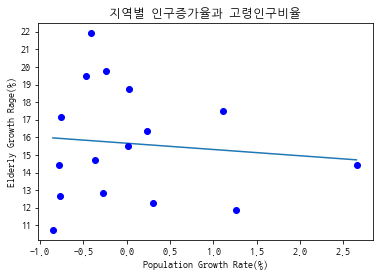

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


%matplotlib inline
mpl.rc('font', family='NanumGothicCoding')
mpl.rc('axes', unicode_minus=False)

data = [[0.3,12.27],[-0.78,14.44],[1.26,11.87],[0.03,18.75],[1.11,17.52],[15.17,9.29],[0.24,16.37],[-0.24,19.78],[-0.77,12.65],
       [-0.47,19.51],[-0.37,14.74],[-0.85,10.72],[-0.41,21.94],[-0.27,12.83],[0.02,15.51],[-0.76,17.14],[2.66,14.42]]

del data[5]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]


a = tf.Variable(tf.random_uniform([1], 0, 1, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 20, dtype = tf.float64, seed = 0))

y = a * x_data + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

lr = 0.1

gradient_decent = tf.train.GradientDescentOptimizer(lr).minimize(rmse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        sess.run(gradient_decent)
        if step % 100 ==0:
            print("Epoch:%.f, RMSE = %.04f, 기울기a = %.4f, y절편 = %.4f"%(step, sess.run(rmse),sess.run(a),sess.run(b)))

    a_data = sess.run(a)
    b_data = sess.run(b)
    
line_x = np.arange(min(x_data), max(x_data),0.1)
line_y = a_data * line_x + b_data
#print(line_x)
#print(line_y)

plt.yticks(np.arange(50))
plt.title("지역별 인구증가율과 고령인구비율")
plt.xlabel("Population Growth Rate(%)")
plt.ylabel("Elderly Growth Rage(%)")
plt.plot(line_x, line_y)
plt.plot(x_data, y_data, 'bo')
plt.show()

Epoch:0, RMSE = 30.2139, 기울기a = 7.5235, y절편 = 80.5984
Epoch:1000, RMSE = 2.8810, 기울기a = 2.2996, y절편 = 79.0026
Epoch:2000, RMSE = 2.8810, 기울기a = 2.3000, y절편 = 79.0000


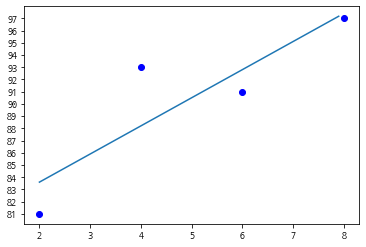

In [57]:
data = [[2,81], [4,93], [6,91], [8,97]]

x_data = [i[0] for i in data]
y_data = [i[1] for i in data]


a = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0))

y = a * x_data + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

lr = 0.1

gradient_decent = tf.train.GradientDescentOptimizer(lr).minimize(rmse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(gradient_decent)
        if step % 1000 ==0:
            print("Epoch:%.f, RMSE = %.04f, 기울기a = %.4f, y절편 = %.4f"%(step, sess.run(rmse),sess.run(a),sess.run(b)))
    a_data = sess.run(a)
    b_data = sess.run(b)
    
line_x = np.arange(min(x_data), max(x_data),0.1)
line_y = a_data * line_x + b_data

plt.yticks(np.arange(-30,120,1))
plt.plot(line_x, line_y)
plt.plot(x_data, y_data, 'bo')
plt.show()

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# x1, x2, y 데이터값
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]
#기울기 a와 y절편 b의 값을 임의로 정하고 a2는 새로 추가되는 값
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))

y = a1 * x1 + a2 * x2 + b

rmse = tf.sqrt(tf.reduce_mean(tf.square(y-y_data)))

lr = 0.1

gradient_decent = tf.train.GradientDescentOptimizer(lr).minimize(rmse)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2000):
        sess.run(gradient_decent)
        if step % 100 ==0:
            print("Epoch:%.f, RMSE = %.04f, 기울기a1 = %.4f, 기울기a1 = %.4f, y절편 = %.4f"
                  %(step, sess.run(rmse),sess.run(a1),sess.run(a2),sess.run(b)))
            z = sess.run(y)
            print(z)
            print("R1 =%d..R2=%d.. R3=%d.. R4=%d"%(z[0],z[1],z[2],z[3]))
            

Epoch:0, RMSE = 49.1842, 기울기a1 = 7.5270, 기울기a1 = 7.8160, y절편 = 80.5980
[ 95.65205187 141.9701668  141.392196   164.26226807]
R1 =95..R2=141.. R3=141.. R4=164
Epoch:100, RMSE = 1.8368, 기울기a1 = 1.1306, 기울기a1 = 2.1316, y절편 = 78.5119
[80.7730054  91.56070432 89.55853302 93.95129683]
R1 =80..R2=91.. R3=89.. R4=93
Epoch:200, RMSE = 1.8370, 기울기a1 = 1.1879, 기울기a1 = 2.1487, y절편 = 78.1057
[80.48144245 91.45217982 89.53042097 94.05491023]
R1 =80..R2=91.. R3=89.. R4=94
Epoch:300, RMSE = 1.8370, 기울기a1 = 1.2122, 기울기a1 = 2.1571, y절편 = 77.9352
[80.35961055 91.41246226 89.5226924  94.10423333]
R1 =80..R2=91.. R3=89.. R4=94
Epoch:400, RMSE = 1.8370, 기울기a1 = 1.2226, 기울기a1 = 2.1607, y절편 = 77.8636
[80.30868066 91.39647337 89.52026791 94.12606154]
R1 =80..R2=91.. R3=89.. R4=94
Epoch:500, RMSE = 1.8370, 기울기a1 = 1.2269, 기울기a1 = 2.1622, y절편 = 77.8335
[80.2873292  91.38987892 89.5193943  94.13542684]
R1 =80..R2=91.. R3=89.. R4=94
Epoch:600, RMSE = 1.8370, 기울기a1 = 1.2288, 기울기a1 = 2.1628, y절편 = 77.8208
[80.278367

In [82]:
data = [[2,0,81],[4,4,93],[6,2,91],[8,3,97]]
x1 = [i[0] for i in data]
x2 = [i[1] for i in data]
y = [i[2] for i in data]

ab = [1.2301,2.1633,77.8117]
a1b1 = [2.3,79]

def predict(x1,x2): # y = ax + b에 a와 b의 값을 대입하여 결과를 출력하는 함수
    return ab[0] * x1 + ab[1] * x2 + ab[2]

def rmse(p, a): # RMSE함수는 평균제곱근 오차함수, # sqrt는 제곱근, mean은 평균값, p 는 실제값, a 는 예측값
    return np.sqrt(((p-a)**2).mean()) 

predict_result = []

for i in range(len(data)):
    predict_result.append(predict(x1[i],x2[i]))

print(predict_result)
print("점수평균 : ", np.mean(predict_result))
print("오차평균 : ", abs(np.mean(predict_result) - np.mean(y)))

[80.2719, 91.3853, 89.5189, 94.14240000000001]
점수평균 :  88.82962500000001
오차평균 :  1.6703749999999928


In [ ]:

def predict2(x): # y = ax + b에 a와 b의 값을 대입하여 결과를 출력하는 함수
    return a1b1[0] * x + a1b1[1]

def rmse2(p, a): # RMSE함수는 평균제곱근 오차함수, # sqrt는 제곱근, mean은 평균값, p 는 실제값, a 는 예측값
    return np.sqrt(((p-a)**2).mean()) 

def rmse_val2(predict_result, y):
    return rmse(np.array(predict_result), np.array(y))
